In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1 Part 1 (Gradient Descent Method)

## Cost function
In this case the cost function is $2x_{1}^2$ + $x_{2}^2$ + $x_{3}^4$

`cost_function(X)` calculates the output of the cost function given input X = [$x_{1}$, $x_{2}$, $x_{3}$]

In [9]:
# cost function
# X = [x_1, x_2, x_3]
# Returns 2(x_1^2) + x_2^2 + x_3^4
def cost_function(X):
    return ((2 * X[0]**2) + (X[1]**2) + (X[2]**4))

# check for convergence
# if difference between two consecutive steps < rel_error then converged
# otherwise not converged
def converged(new_val, old_val, rel_err):
    return abs((new_val - old_val) / old_val) < rel_err


## Gradient
$$\nabla f= \begin{bmatrix}
           4x_{1} \\
           2x_{2} \\
           4x_{3}^3 \\
            \end{bmatrix}$$


In [10]:
# gradient of f at X
# X = [x_1, x_2, x_3]
def gradient(X):
    x_1 = 4 * X[0]
    x_2 = 2 * X[1]
    x_3 = 4 * X[2]**3

    return np.array([x_1, x_2, x_3])

## Gradient Descent
Termination conditions:  
- MAX_ITERATION = 20  
- REL_ERROR = 0.001  
- $\alpha_{t}$ = 0.1

This function will use the gradient descent method to update $x_{1}$, $x_{2}$, $x_{3}$ to minimize the function $2x_{1}^2$ + $x_{2}^2$ + $x_{3}^4$.

There will be `MAX_ITERATION` number of steps unless if the difference between 2 consecutive steps is less than `REL_ERROR`, then the algorithm will stop early.

Iterations: 20
Learning rate: 0.1
Optimal Value: 0.004818289181363018
Optimal Solution: [ 3.65615844e-05 -4.61168602e-02 -2.27771547e-01]


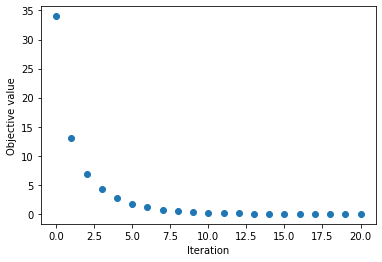

In [11]:
# minimize loss function
# learningRate: learning rate (alpha_t)
# MAX_ITERATION: max iteration termination condition
# REL_ERROR: relative error termination condition
def gradDescent(X, learningRate = 0.1, MAX_ITERATION = 20, REL_ERROR = 0.001):
    iterations = 0                  # Tracker of number of iterations
    old_val = cost_function(X)      # Tracker of cost value for previous step
    optimal_val = old_val           # Tracker for minimum value of cost function
    optimal_sol = X                 # Tracker for solution that provides min cost value
    cost_vals = np.array([old_val]) # Array of cost values used to plot the cost value wrt iteration num

    for _ in range(MAX_ITERATION):
        # Calculate new input using gradient descent
        X = X - learningRate * gradient(X)
        new_val = cost_function(X)
        
        iterations += 1
        cost_vals = np.append(cost_vals, new_val)
        
        # Update optimal solution if needed
        if (new_val < optimal_val):
            optimal_val = new_val
            optimal_sol = X

        # Check for convergence
        if converged(new_val, old_val, REL_ERROR):
            break
        
        old_val = new_val

    num_iter = np.arange(iterations + 1)
    plt.scatter(num_iter, cost_vals)
    plt.xlabel("Iteration")
    plt.ylabel("Objective value")
    print("Iterations:", iterations)
    print("Learning rate:", learningRate)
    print("Optimal Value:", optimal_val)
    print("Optimal Solution:", optimal_sol)

gradDescent(X = np.array([1, -4, 2]))

## Q1 (I) Answer 
1). The optimal value is 0.004818289181363018  
The optimal solution is  
$x_{1}$=3.65615844e-05  
$x_{2}$=-4.61168602e-02  
$x_{3}$=-2.27771547e-01

2).
No. It is not always the case that gradient descent steps decrease the loss. Every step in the Gradient descent method will take us in the direction of steepest descent (towards a local minimum) however, how big the step taken determines whether we are actually decreasing the loss.  
In the case that the learning rate ($\alpha_{t}$) is too big, then the step taken could be so big as to overshooting the local mimimum and even take you to a position further away from the local minimum than you were in the previous iteration.  
This is evident in the below example where the learning rate ($\alpha_{t}$) is set higher to a value of 0.13, we can see on the third iteration, the loss increases drastically.

Iterations: 3
Learning rate: 0.13
Optimal Value: 30.990223360000005
Optimal Solution: [ 0.48 -2.96 -2.16]


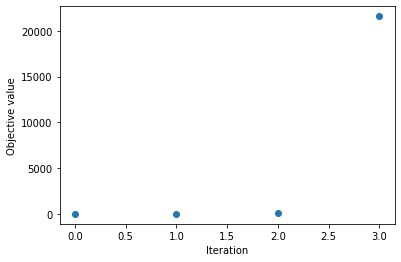

In [12]:
gradDescent(X = np.array([1, -4, 2]), learningRate=0.13, MAX_ITERATION=3)

# Question 1 Part 2 (Newton's Method)

## Newton's Method
Rather than using a constant learning rate value $\alpha_{t}$ like in normal Gradient descent. Newton's method involves the inverse of the hessian matrix of f.  
$$\left[\nabla^2 f\right]^{-1}= \left[\begin{matrix}
                4 & 0 & 0 \\
                0 & 2 & 0 \\
                0 & 0 & 12x_{3}^2
                \end{matrix}\right]^{-1}$$

In [13]:
# compute the inverse of hessian matrix of f at X
# X = [x_1, x_2, x_3]
def newtonsRate(X):
    hessian = np.array([[4, 0, 0],
                        [0, 2, 0],
                        [0, 0, 12 * X[2]**2]])
    return np.linalg.inv(hessian)

Iterations: 20
Optimal Value: 1.3086371897047623e-13
Optimal Solution: [0.         0.         0.00060146]


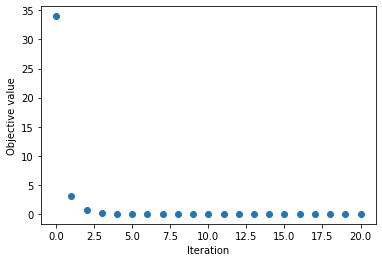

In [14]:
# newton's method to minimize loss function
# learningRate: learning rate (alpha_t)
# MAX_ITERATION: max iteration termination condition
# REL_ERROR: relative error termination condition
def newtonMethod(X, MAX_ITERATION = 20, REL_ERROR = 0.001):
    iterations = 0                  # Tracker of number of iterations
    old_val = cost_function(X)      # Tracker of cost value for previous step
    optimal_val = old_val           # Tracker for minimum value of cost function
    optimal_sol = X                 # Tracker for solution that provides min cost value
    cost_vals = np.array([old_val]) # Array of cost values used to plot the cost value wrt iteration num

    for _ in range(MAX_ITERATION):
        # Calculate new input using newton's method
        X = X - np.dot(newtonsRate(X), gradient(X))
        new_val = cost_function(X)
        
        iterations += 1
        cost_vals = np.append(cost_vals, new_val)
        
        # Update optimal solution if needed
        if (new_val < optimal_val):
            optimal_val = new_val
            optimal_sol = X

        # Check for convergence
        if converged(new_val, old_val, REL_ERROR):
            break
        
        old_val = new_val

    num_iter = np.arange(iterations + 1)
    plt.scatter(num_iter, cost_vals)
    plt.xlabel("Iteration")
    plt.ylabel("Objective value")
    print("Iterations:", iterations)
    print("Optimal Value:", optimal_val)
    print("Optimal Solution:", optimal_sol)

newtonMethod(X = np.array([1, -4, 2]))

## Q1 (II) Answer 
1). The optimal value is 1.3086371897047623e-13  
The optimal solution is  
$x_{1}$=0  
$x_{2}$=0  
$x_{3}$=0.00060146

2). Gradient descent algorithm searches for a local minimum while Newton's method searches for a root of a function.  
Rather than the use  of a hyper-parameter $\alpha_{t}$ like in gradient descent, newton's method utilizes the second derivative (hessian matrix) of the cost function in its algorithm.  
Gradient descent simply uses the gradient to go in the direction of steepest descent and the learning rate ($\alpha_{t}$) to determine how big of a step to take in order to approach a local minimum avoiding overshooting.  
Newton's method uses more information with the second derivative (hessian matrix) of the cost function to guess and take a direct route to a root of the cost function which can lead to Newton's method converging in less iterations than gradient descent algorithm.  

3). As seen in the updating rule for Newton's method, it requires the inverse of the hessian matrix of the objective function. If the objective function has $n$ inputs, then $n^2$ values need to be computed to obtain the hessian matrix. This in itself is computationally costly especially when the objective function takes in large amounts of inputs. In addition, this method also requires that the inverse of the hessian matrix exists. 
